## Mongo Database Manager
20200408_1606

In [1]:
import pandas as pd
import os, glob, shutil
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tqdm import tqdm

from IPython.display import display
from IPython.display import Image
print("Setup Complete")


import pymongo
import json
from bson.objectid import ObjectId
print("Mongo setup Complete")

Setup Complete
Mongo setup Complete


#### Helper Function

In [2]:
def barplot_distribution(input_df, col='filename', title="distribution", table=True):
    title="{} {}".format(col, title)
    if (table):
        print(title,"------------------")
        print(input_df.groupby(col)[col].count())
    plt.figure(figsize=(32,6))
    plt.title(title)
    sns.barplot(x=input_df.groupby(col)[col].count().index, y=input_df.groupby(col)[col].count().values)



### Validation function

In [3]:
# *************************************************************
#   Author       : HM Fazle Rabbi
#   Description  : Validation invalid coordinates in x1, y1...
#   Date Modified: 
#   Copyright © 2000, MV Technology Ltd. All rights reserved.
# *************************************************************
def validate_x1y1x2y2 (x1,x2,y1,y2, xmin, xmax, ymin, ymax, msg):
    success = True
    if ((x1 > xmax) or (x2 > xmax)):
        success = False
#         print("Failed: ((x1 > xmax) or (x2 > xmax))")
    if ((x1 < xmin) or (x2 < xmin)):
        success = False
#         print("Failed: ((x1 < xmin) or (x2 < xmin))")

    if ((y1 > ymax) or (y2 > ymax)):
        success = False
#         print("Failed: ((y1 > ymax) or (y2 > ymax))")
    if ((y1 < ymin) or (y2 < ymin)):
        success = False
#         print("Failed: ((y1 < ymin) or (y2 < ymin))")

    if ((x2 - x1) <= 1 ):
        success = False
#         print("Failed: (x2 <= x1)")
    if ((y2 - y1) <= 1):
        success = False
#         print("Failed: (y2 <= y1)")

    if not success:
#         print("Invalid coordinate:\n\t{} {} {} {} \n\t{} {} {} {}".format(x1,x2,y1,y2, xmin, xmax, ymin, ymax))
#         print(msg)
        pass
    return success

# *************************************************************
#   Author       : HM Fazle Rabbi
#   Description  : Validation invalid coordinates in x1, y1...
#   Date Modified: 
#   Copyright © 2000, MV Technology Ltd. All rights reserved.
# *************************************************************
def validate_cxcy (cx, cy, xmin, xmax, ymin, ymax, msg):
    success = True
    if ((cx > xmax) or (cy > ymax)) :
        success = False
        print("Failed: (cx > xmax) or (cy > ymax) ")
    if ((cx < xmin) or (cy < ymin)):
        success = False
        print("Failed:  ((cx < xmin) or (cy < ymin))")
        if not success:
            print(msg)
    return success

### Create Mongo db

In [4]:
myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["Aoi_Boards-00"]
myfovbd = myclient["Aoi_Boards_2020_E00"]

In [35]:
# Delete old database
if False:
    myboard_col = mydb["board_information"]
    myboard_col.drop()
    mylabel_col = mydb["aoi_fox_labels"]
    mylabel_col.drop()

In [8]:
# Get collection
myboard_col = mydb["Aoi_Boards_2020_E00"]
mylabel_col = mydb["Aoi_Boards_2020_E00"]

print("myboard_col.count():\t", myboard_col.estimated_document_count())
print("mylabel_col.count():\t", mylabel_col.estimated_document_count())

myboard_col.count():	 30185
mylabel_col.count():	 30185


### Read Board

In [53]:
def createUpdateJason(src_dir ="D:/FZ_WS/JyNB/TF_Research_Api_LD_2_0/research/object_detection/debug/Board_FOV/B8PA_LEFT_90121351_B125"):
    src_dir=os.path.normpath(src_dir)
    all_flist = os.listdir(src_dir)
    full_path_alllist = [os.path.join(src_dir, x) for x in all_flist]
    pbar =tqdm (full_path_alllist)
    for fname in pbar:
        if (not (os.path.isfile(fname[:-4]+".jpg"))) or (fname[-4:] == ".jpg"):
            continue
        print(fname,)
        
createUpdateJason()
    

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 4335.37it/s]

D:\FZ_WS\JyNB\TF_Research_Api_LD_2_0\research\object_detection\debug\Board_FOV\B8PA_LEFT_90121351_B125\unknown___5e8e75a06b161ffa34f40013.txt
D:\FZ_WS\JyNB\TF_Research_Api_LD_2_0\research\object_detection\debug\Board_FOV\B8PA_LEFT_90121351_B125\unknown___5e8e75a06b161ffa34f40015.txt
D:\FZ_WS\JyNB\TF_Research_Api_LD_2_0\research\object_detection\debug\Board_FOV\B8PA_LEFT_90121351_B125\unknown___5e8e75a06b161ffa34f40017.txt
D:\FZ_WS\JyNB\TF_Research_Api_LD_2_0\research\object_detection\debug\Board_FOV\B8PA_LEFT_90121351_B125\unknown___5e8e75a06b161ffa34f40019.txt
D:\FZ_WS\JyNB\TF_Research_Api_LD_2_0\research\object_detection\debug\Board_FOV\B8PA_LEFT_90121351_B125\unknown___5e8e75a06b161ffa34f4001b.txt
D:\FZ_WS\JyNB\TF_Research_Api_LD_2_0\research\object_detection\debug\Board_FOV\B8PA_LEFT_90121351_B125\unknown___5e8e75a06b161ffa34f4001d.txt


### Board info graph analysis

In [3]:
print(myboard_col.find_one(),"\n")
print(mylabel_col.find_one())

NameError: name 'myboard_col' is not defined

#### Error Analysis

error error count distribution ------------------
error
(BARCODE:16N5114078M7)                               1
(BARCODE:16N5114078M8)                               1
(BARCODE:16N513307X1G)                               1
(BARCODE:16N513307X1H)                               1
(BARCODE:16N513307X1J)                               1
(BARCODE:16N513307X1K)                               1
(BARCODE:GN8341)                                     1
(BARCODE:IL0883)                                     1
(BARCODE:JI2351)                                     1
(BARCODE:JL9005)                                     1
(BARCODE:P1045483-00-J:REV01:SADU19057B009W8)        1
(BARCODE:XDWZMQ53N1100705)                           1
BADJOINT                                           125
BILLBOARD                                          258
BRIDGING                                            25
COPLANARITY                                         67
DAMAGED                                             20
EXTRA    

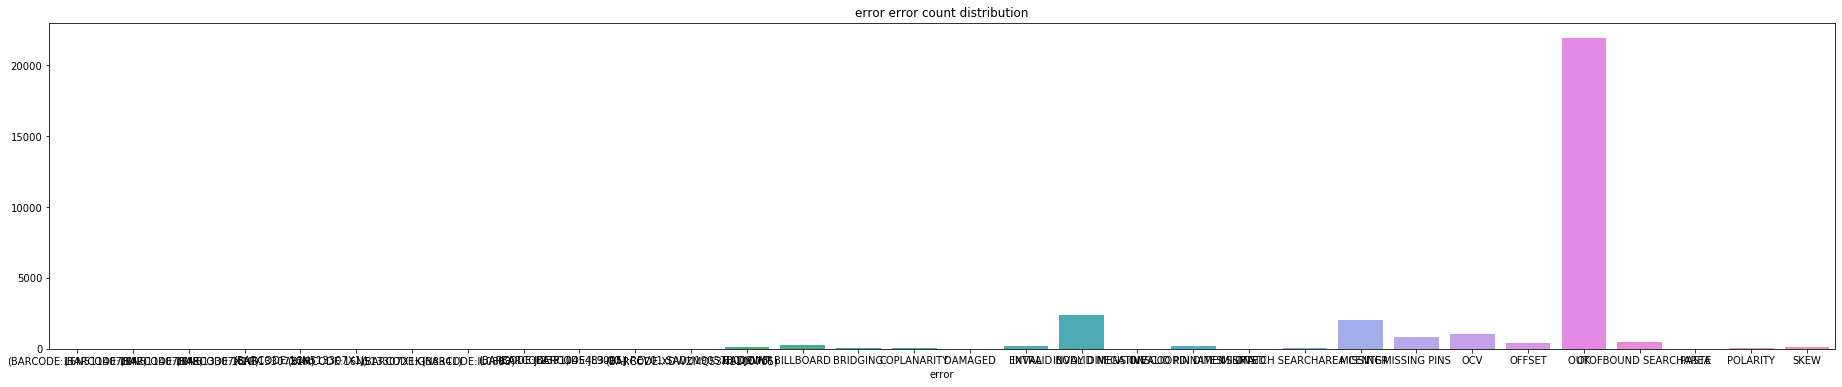

In [9]:
myquery = { "error": "INVALID BODY DIMENSIONS" }
mydoc = myboard_col.find(myquery)
_df=pd.DataFrame(myboard_col.find({},{'error':True}))
barplot_distribution(_df, col='error',  title="error count distribution", table=True)

board_name count distribution ------------------
board_name
369_330-E0900-000-369_A_D        872
4_LTM4633V8                       12
4_LTM4644V13                      20
6255G02_bot1                      10
9611GCR2-T-7                       4
AGG5500-61003-R3-T                 5
AGIH-NVR-K1025-61110TREV4-pan     14
AGIH-VR-G2571-61103-panelized      6
APEXTEST1                        327
APEX_V510_Top_Direction           16
AVTG-03-25420-09-A_B_90           20
C7H05-SATM001-0B                 702
CF340-V6-P4805V01-BOT-testing     28
NOKIA_NH085422A_107_FCTB_TOP      18
P270669_profiling                 73
P270669top                       125
PCA-0280-BOT_90                    1
PEC-02756-09-9-TP                 10
PH9MQV103A0-T(WY11000)(A)         12
PN-271195_1_top                    4
R190-03_TOP                        3
RGB-625-0629-01_N-Bot             13
S-253598749_TOP                   42
TX1045483-00-JB-1-BOT              1
pena                              30
Name: board_nam

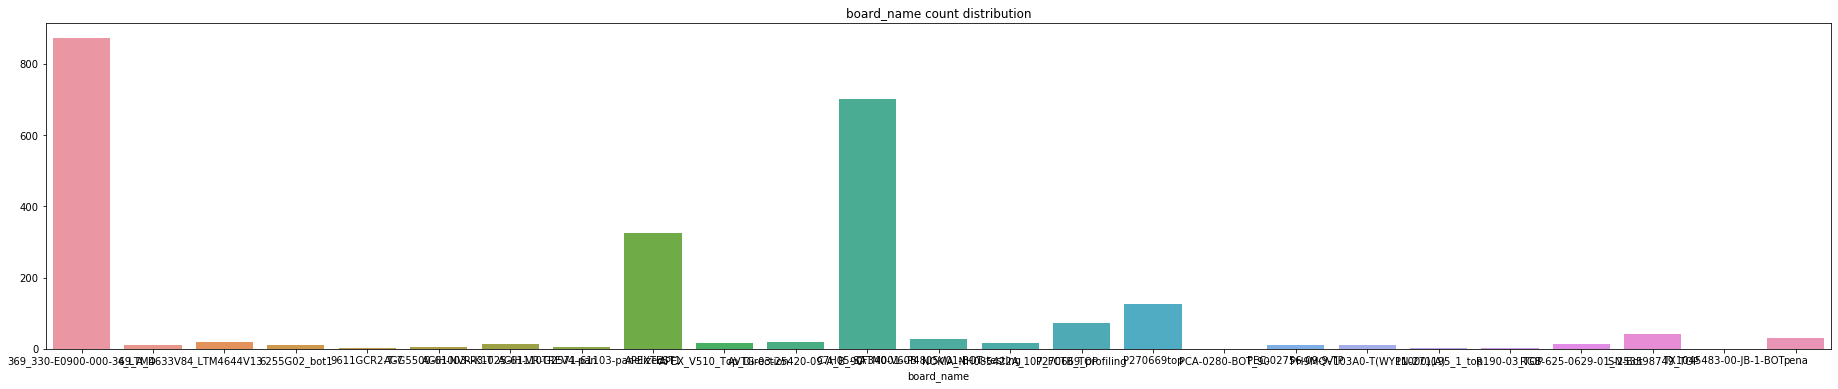

In [10]:
myquery = { "error": "INVALID BODY DIMENSIONS" }
mydoc = myboard_col.find(myquery)
# _df=pd.DataFrame(myboard_col.find({},{'error':True}))
_df=pd.DataFrame(mydoc)
barplot_distribution(_df, col='board_name',  title="count distribution", table=True)

package count distribution ------------------
package
BGA                88
CAPACITOR_NL       96
CC               6220
COIL_INDUCTOR      60
CR               6370
CRNETWORK          12
CRYSTAL            46
DPAK               44
ECAP               78
INDUCTOR           36
LED               292
MELF               20
QFN                38
QFP                16
SOD_FLAT          206
SOD_GULL            8
SOD_J              88
SOIC              596
SOT              1076
SOT223_4L          12
TANTALAM          108
unknown          1144
Name: package, dtype: int64


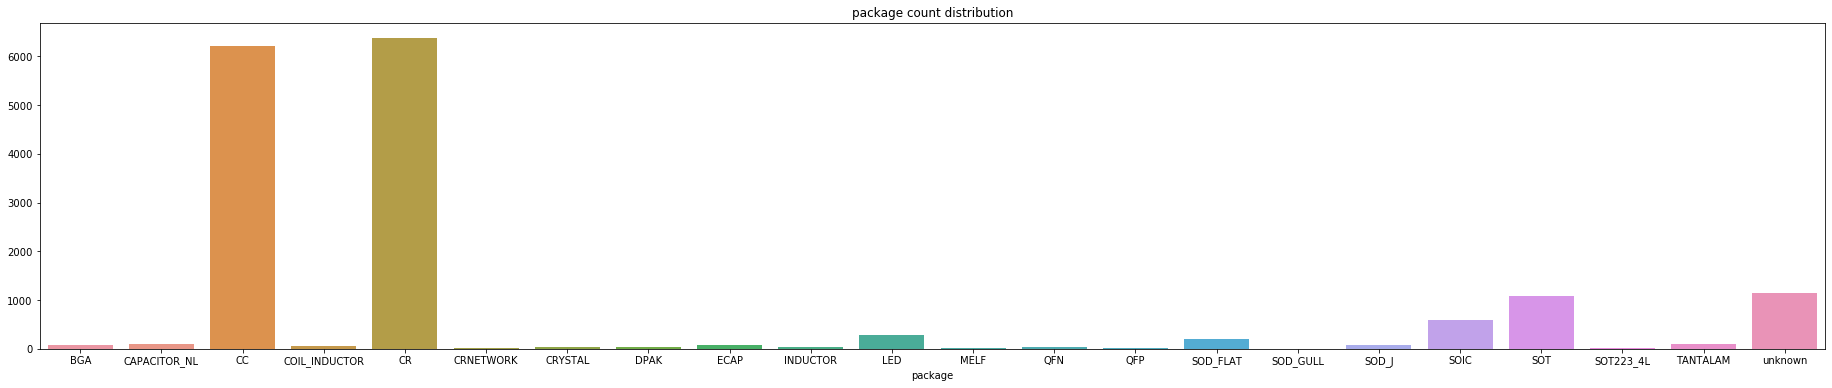

In [96]:
_df=pd.DataFrame(myboard_col.find({},{'package':True}))
barplot_distribution(_df, col='package',  title="count distribution", table=True)

In [ ]:
myquery = { "error": "INVALID BODY DIMENSIONS" }
mydoc = myboard_col.find(myquery)
_df=pd.DataFrame(myboard_col.find({},{'error':True}))
barplot_distribution(_df, col='error',  title="error count distribution", table=True)